# Mushrooms, Edible or Poisonous? 

Collected from Audobon Society Field Guide: mushrooms described in terms of physical characteristics. classification: poisonous or edible. The dataset has been imported from [UCI](https://archive.ics.uci.edu/dataset/73/mushroom) and for the purpose of this portfolio it has been simplified from 22 different features to 10 + a one (1) target value - poisonous. Only visual and easiest to observe in nature features were selected. The exact dataset that was used has been uploaded to github.

More info on the dataset can be found in the following table: 

|Column|Description|
|:-----:|:-----:|
|poisonous|edible = e, poisonous = p|
|cap-shape|bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s|
|cap-color|brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u,red = e, white = w, yellow = y|
|bruises|bruises = t, no = f|
|gill-color|black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y|
|stalk-shape|enlarging = e, tapering = t|
|veil-color|brown = n, orange = o, white = w, yellow = y|
|spore-print-color|black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, white = w, yellow = y|
|ring-number|none = n, one = o, two = t|
|population|abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y|
|habitat|grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d|

 <img src="https://cdn.shopify.com/s/files/1/0031/4756/3081/files/Anatomy3.jpg?v=1596220270" width="400" height="400" />

The goal is to find answers to the following questions:

**Q1. Can we predict whether a mushroom is poisonous or edible based on its physical characteristics?**

**Q2. What are the most significant features that influence a mushroom's edibility?**

In order to answer these questions, the following models will be used and evaluated: **Logistic Regresion**, **K-Nearest Neighbors**, **Decision Trees** and **Random Forest**. Logistic Regresion will serve as a baseline model for classification. Decision Trees and Random Forest will give us information on what are the most significant features that influence a mushroom's edibility.

First, we will import all the necessary libraries:

## 1. Data Preparation and Exploration:

### 1.1 Data Exploration

First, we will import all the necessary libraries:

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
# Load the dataset
data = pd.read_csv('agaricus-lepiota-data.csv')
data.head()

,poisonous,cap-shape,cap-color,bruises,gill-color,stalk-shape,veil-color,ring-number,spore-print-color,population,habitat
0,p,x,n,t,k,e,w,o,k,s,u
1,e,x,y,t,k,e,w,o,n,n,g
2,e,b,w,t,n,e,w,o,n,n,m
3,p,x,w,t,n,e,w,o,k,s,u
4,e,x,g,f,k,t,w,o,n,a,g


In [111]:
print(data.shape) # looking into the shape of the data frame
print("null values:")
print(data.isna().sum()) #identify and count null values

(8124, 11)
null values:
poisonous            0
cap-shape            0
cap-color            0
bruises              0
gill-color           0
stalk-shape          0
veil-color           0
ring-number          0
spore-print-color    0
population           0
habitat              0
dtype: int64


In [112]:
# Display the first few rows of the dataset and the general information
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   poisonous          8124 non-null   object
 1   cap-shape          8124 non-null   object
 2   cap-color          8124 non-null   object
 3   bruises            8124 non-null   object
 4   gill-color         8124 non-null   object
 5   stalk-shape        8124 non-null   object
 6   veil-color         8124 non-null   object
 7   ring-number        8124 non-null   object
 8   spore-print-color  8124 non-null   object
 9   population         8124 non-null   object
 10  habitat            8124 non-null   object
dtypes: object(11)
memory usage: 698.3+ KB


,poisonous,cap-shape,cap-color,bruises,gill-color,stalk-shape,veil-color,ring-number,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,10,2,12,2,4,3,9,6,7
top,e,x,n,f,b,t,w,o,w,v,d
freq,4208,3656,2284,4748,1728,4608,7924,7488,2388,4040,3148


Top values in some of the columns have very high frequency: **veil-color**. We will further explore the dataset by visualising the features against the poisonous feature:

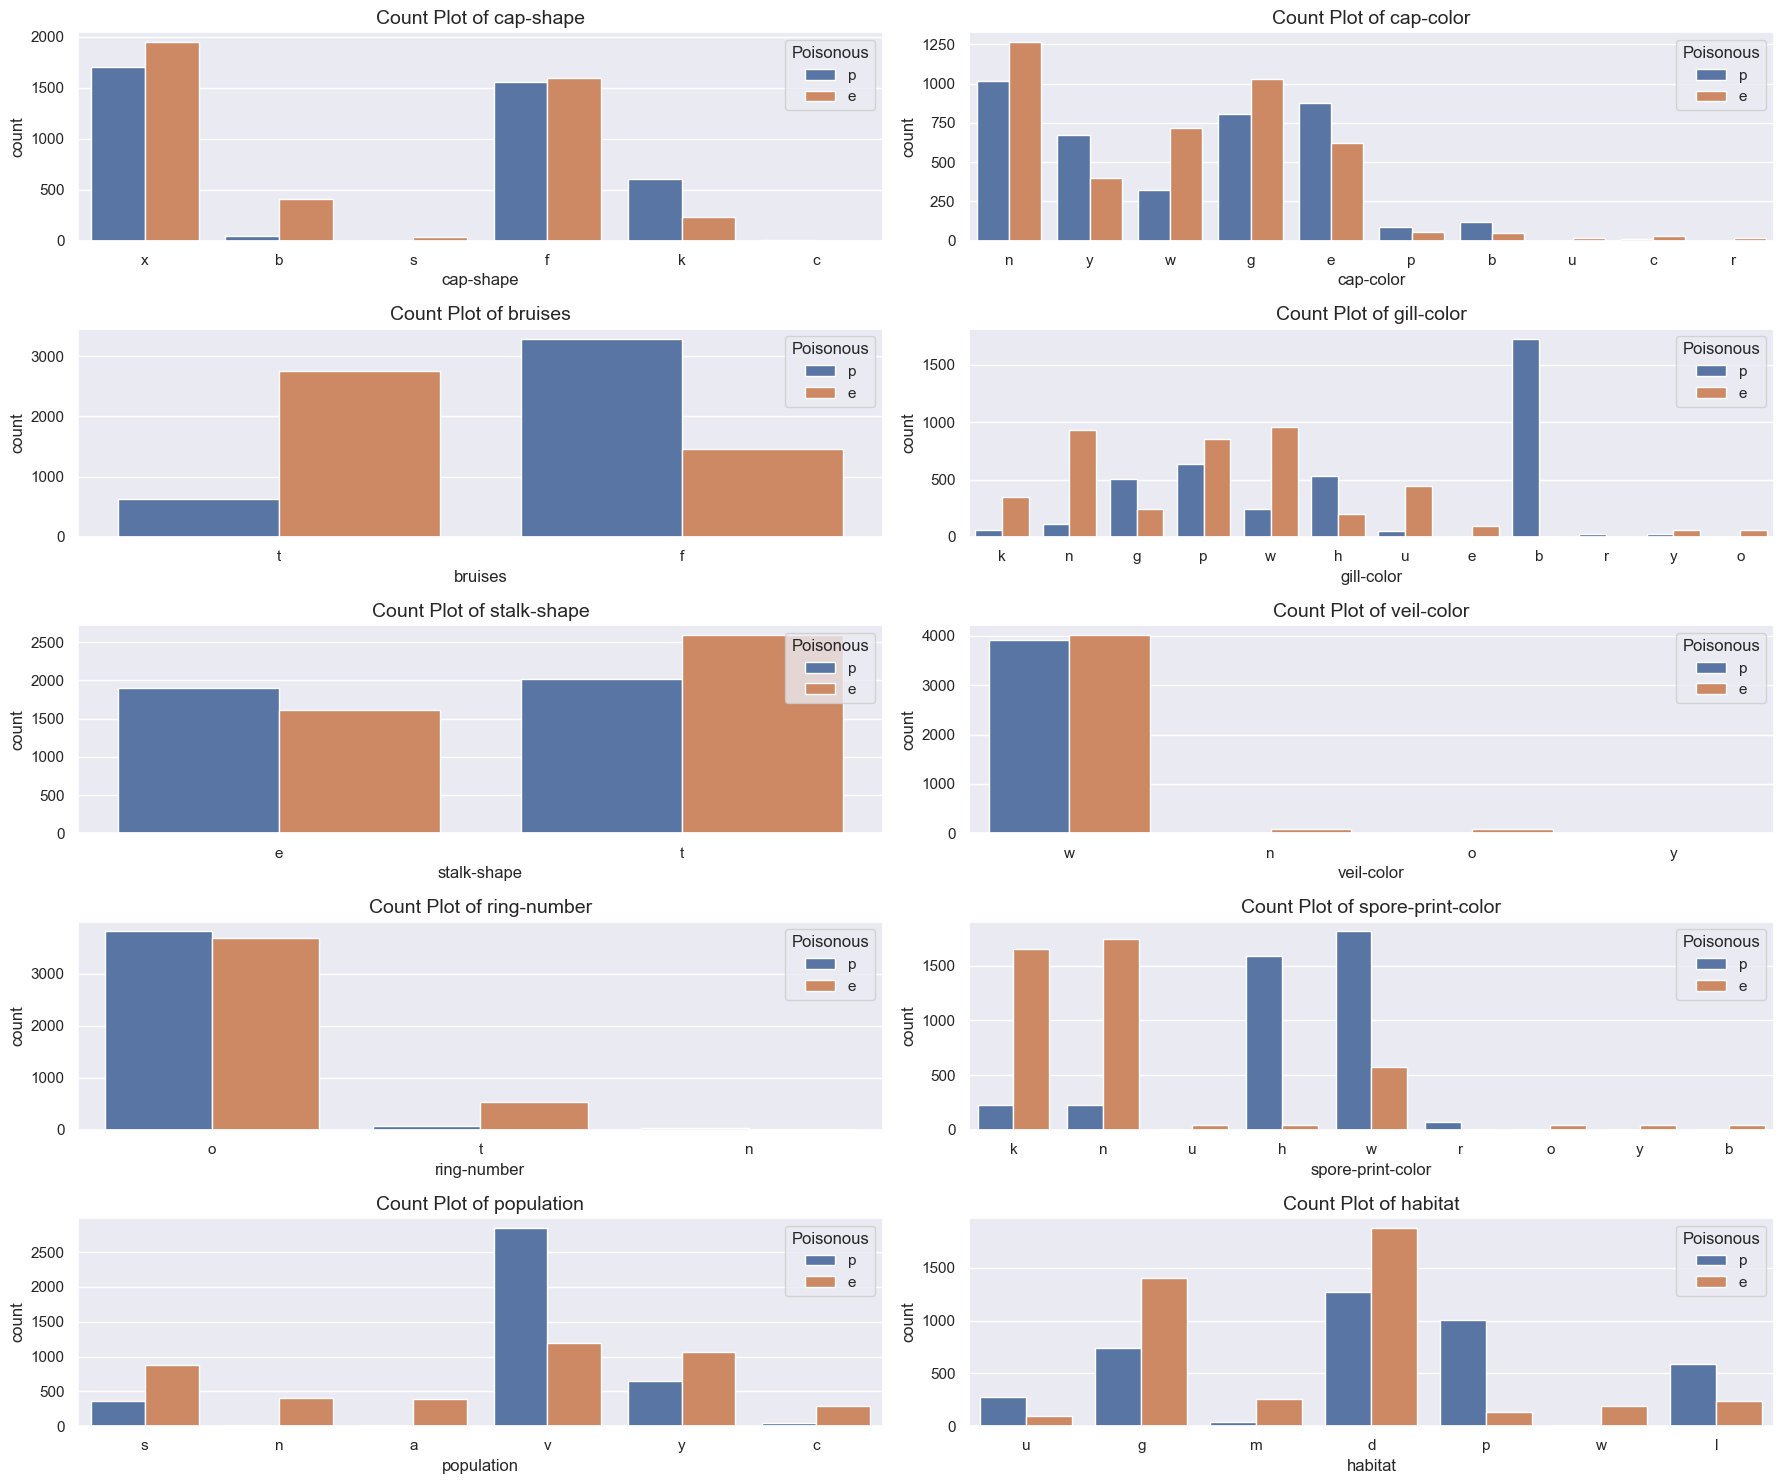

In [113]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(5, 2, figsize=(18, 15))
features = ['cap-shape', 'cap-color', 'bruises', 'gill-color', 'stalk-shape','veil-color', 'ring-number', 'spore-print-color', 'population', 'habitat']
for ax, feature in zip(axes.flatten(), features):
    sns.countplot(data=data, x=feature, hue='poisonous', ax=ax)
    ax.set_title(f'Count Plot of {feature}', fontsize=14)
    ax.legend(title='Poisonous', loc='upper right')
plt.tight_layout()
plt.show()

Based on the high frequency for w (white) in the 'veil-color' (7924/8124) column and the way it's distributed in a balanced way among poisonous and edible mushrooms, the column is being deleted.

In [114]:
data = data.drop('veil-color', axis=1)
data.head()

,poisonous,cap-shape,cap-color,bruises,gill-color,stalk-shape,ring-number,spore-print-color,population,habitat
0,p,x,n,t,k,e,o,k,s,u
1,e,x,y,t,k,e,o,n,n,g
2,e,b,w,t,n,e,o,n,n,m
3,p,x,w,t,n,e,o,k,s,u
4,e,x,g,f,k,t,o,n,a,g


Next we look into the distribution of the target variable 'poisonous'. The visualisation shows the dataset is well balanced between edible and poisonous mushrooms:

In [115]:
data['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

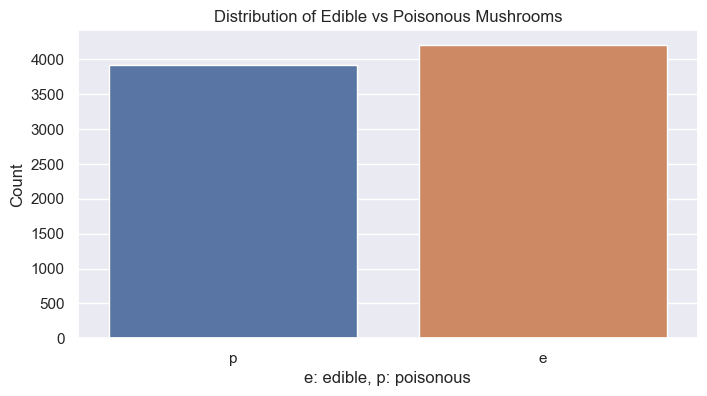

In [116]:
# Visualize the target variable distribution
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
sns.countplot(x='poisonous', data=data)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('e: edible, p: poisonous')
plt.ylabel('Count')
plt.show()

### 1.2. Encoding Variables

Since all features are categorical, they will be converted to numerical. Because there is no ordinal relationship between categories label encoding is not an accurate option and **one-hot encoding** is being used. The new dataframe is being saved in encoded_data and it includes a new binary column for each category.

In [117]:
# Apply one-hot encoding to all categorical variables
encoded_data = pd.get_dummies(data, columns=['poisonous', 'cap-shape', 'cap-color', 'bruises', 'gill-color', 'stalk-shape', 'ring-number', 'spore-print-color', 'population', 'habitat'])

# Display the first few rows of the encoded dataset
encoded_data.head()

,poisonous_e,poisonous_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-color_b,cap-color_c,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [118]:
encoded_data.info() #now the dataset has 59 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   poisonous_e          8124 non-null   bool 
 1   poisonous_p          8124 non-null   bool 
 2   cap-shape_b          8124 non-null   bool 
 3   cap-shape_c          8124 non-null   bool 
 4   cap-shape_f          8124 non-null   bool 
 5   cap-shape_k          8124 non-null   bool 
 6   cap-shape_s          8124 non-null   bool 
 7   cap-shape_x          8124 non-null   bool 
 8   cap-color_b          8124 non-null   bool 
 9   cap-color_c          8124 non-null   bool 
 10  cap-color_e          8124 non-null   bool 
 11  cap-color_g          8124 non-null   bool 
 12  cap-color_n          8124 non-null   bool 
 13  cap-color_p          8124 non-null   bool 
 14  cap-color_r          8124 non-null   bool 
 15  cap-color_u          8124 non-null   bool 
 16  cap-color_w          812

The correlation between the features is being explored with a Correlation Heatmap:

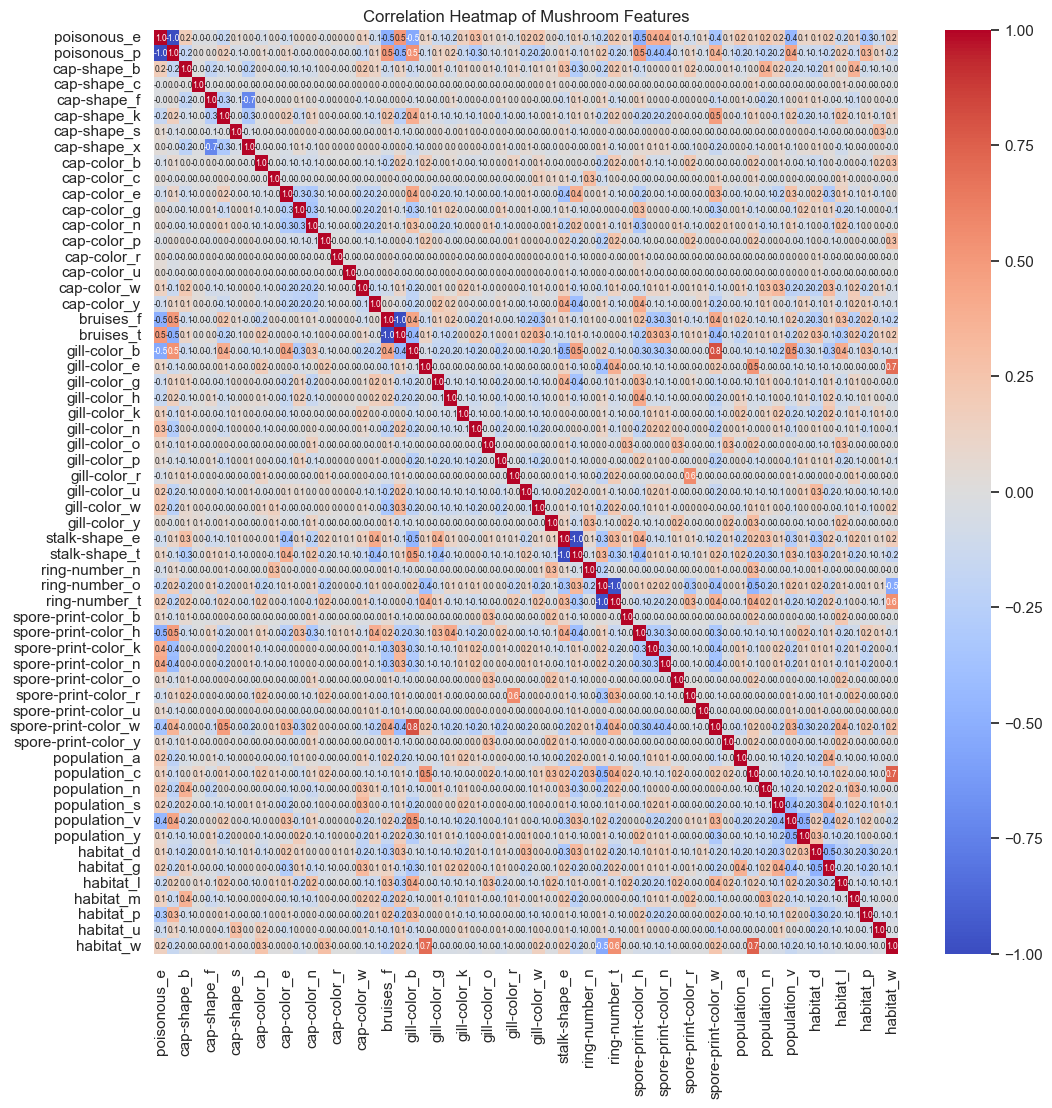

In [119]:
corr = encoded_data.corr()
corr.style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', annot_kws={'size': 6})
plt.title('Correlation Heatmap of Mushroom Features')
plt.show()

## 2. Model Training

In [120]:
# Splitting the data into features and target variable
# Dropping 'poisonous_e' to avoid multicollinearity as it is perfectly negatively correlated with 'poisonous_p'
X = encoded_data.drop(columns=['poisonous_e', 'poisonous_p'])
y = encoded_data['poisonous_p']

# Splitting the data into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Checking the dimensions of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6499, 57), (1625, 57), (6499,), (1625,))

### 2.1. Logistic Regression

In [121]:
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and test data
test_predictions = model.predict(X_test)

# Calculate the accuracy on both training and test sets
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test set:", test_accuracy)
print("Test set classification report:")
print(classification_report(y_test, test_predictions))

Accuracy test set: 0.9821538461538462
Test set classification report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       833
        True       0.97      0.99      0.98       792

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



The Logistic Regression model performed well with an accuracy of about 98.2%. Here are the detailed metrics:
This model serves as a baseline and it can be improved with more complex models like K-NN, decision trees, and random forest.

### 2.2. K-Nearest Neighbors KNN

In [122]:
X_train = np.ascontiguousarray(X_train.values) #this has been added due to avoid an error
X_test = np.ascontiguousarray(X_test.values) #this has been added due to avoid an error

In [123]:
# Initialize the K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and classification report
knn_accuracy_test = accuracy_score(y_test, y_pred_knn)

knn_report = classification_report(y_test, y_pred_knn)

print("Accuracy test set:", knn_accuracy_test)
print("Test set classification report:")
print(knn_report)

Accuracy test set: 0.9846153846153847
Test set classification report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       833
        True       0.98      0.99      0.98       792

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



The K-Nearest Neighbors (K-NN) model has shown even better performance than the logistic regression, achieving an accuracy of about 98.46%. The recall improved and the model is better at identifying actual poisonous mushrooms then in the Logistical Regresion Model (0.97 < 0.98).

#### Tune the hyper-parameter K

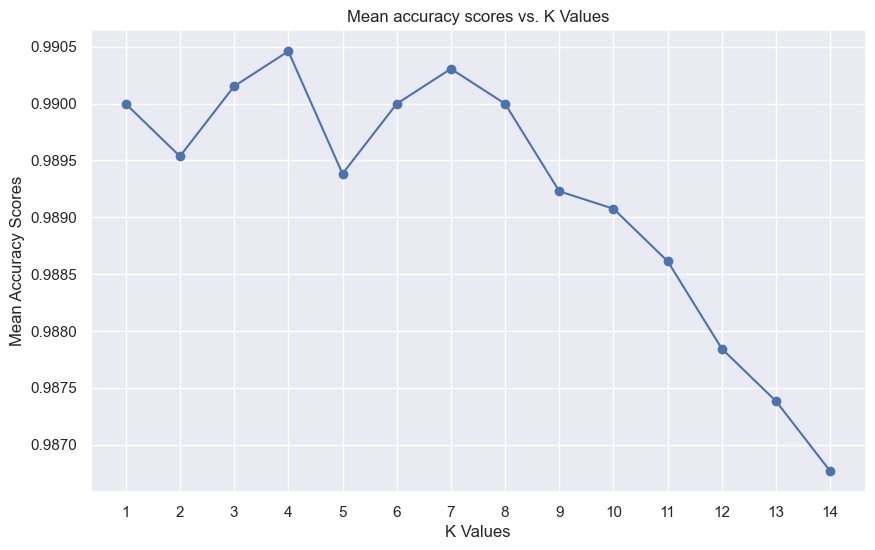

Best k value: 4


In [124]:
# define the range of k values to search over
k_values = np.arange(1, 15)  

# define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# perform grid search using GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# mean cross-validated accuracy scores for each k value
mean_scores = grid_search.cv_results_['mean_test_score']

# visualization
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean accuracy scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Accuracy Scores')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

We can observe in the visualisation how the accuracy score increases with a higher k value until k 4 where it peaks at ~99.05% and from there on accuracy starts to deacrease.

### 2.3. Decision Tree Model

In [125]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=88)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = decision_tree.predict(X_test)

# Calculate accuracy and classification report
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print("Accuracy test set:", dt_accuracy)
print("Test set classification report:")
print(dt_report)

Accuracy test set: 0.992
Test set classification report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       833
        True       0.99      0.99      0.99       792

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



The Decision Tree model has shown better performance than the previous model with an accuracy of 99.2%. All values increased across the board and the model accuracy got better.

#### Visualisation of the most important features in Decision Tree:

This model offers insights into which features are most important in making predictions when using the Decision Tree model and we will take a further look into them:

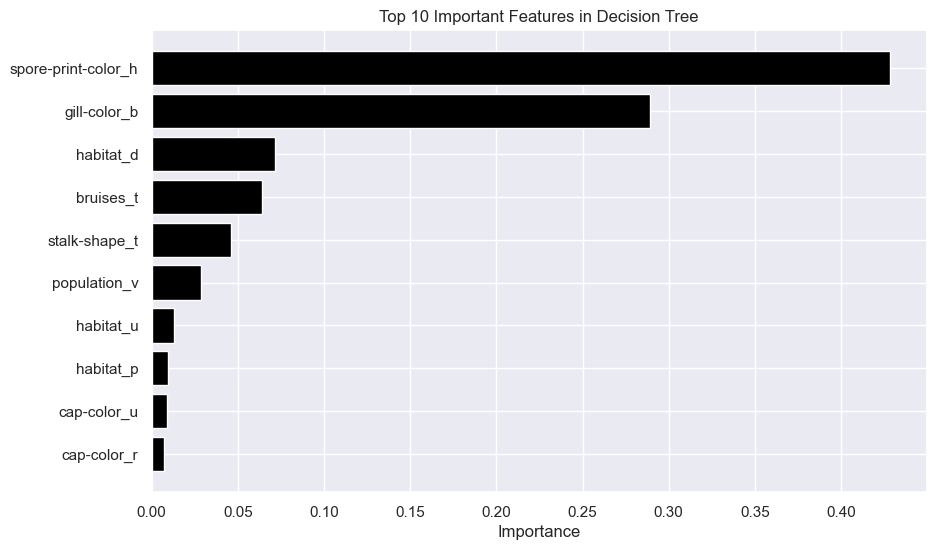

In [126]:
# Extract feature importances from the decision tree model
feature_importances = decision_tree.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10], color='black')
plt.xlabel('Importance')
plt.title('Top 10 Important Features in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

Features like spore-print-color-h (color: chocolate) with a 0.42 importance followed by gill-color-b (color: buff) with 0.28 importance are the most importent when using the Decision Tree model. After that, habitat-d: woods and bruises_t: has bruises with a much lower importance(~0.07), followed by others such as stalk-shape_t and population_v.

### 2.4. Random Forest

In [127]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state = 88)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy and classification report
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Accuracy test set:", rf_accuracy)
print("Test set classification report:")
print(rf_report)

Accuracy test set: 0.992
Test set classification report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       833
        True       0.99      0.99      0.99       792

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Random Forest model has shown simmilar performance than the previous model with an accuracy of 99.2%. All values increased across the board and the model accuracy got better.

#### Visualisation of the most important features in Decision Tree vs Random Forest:

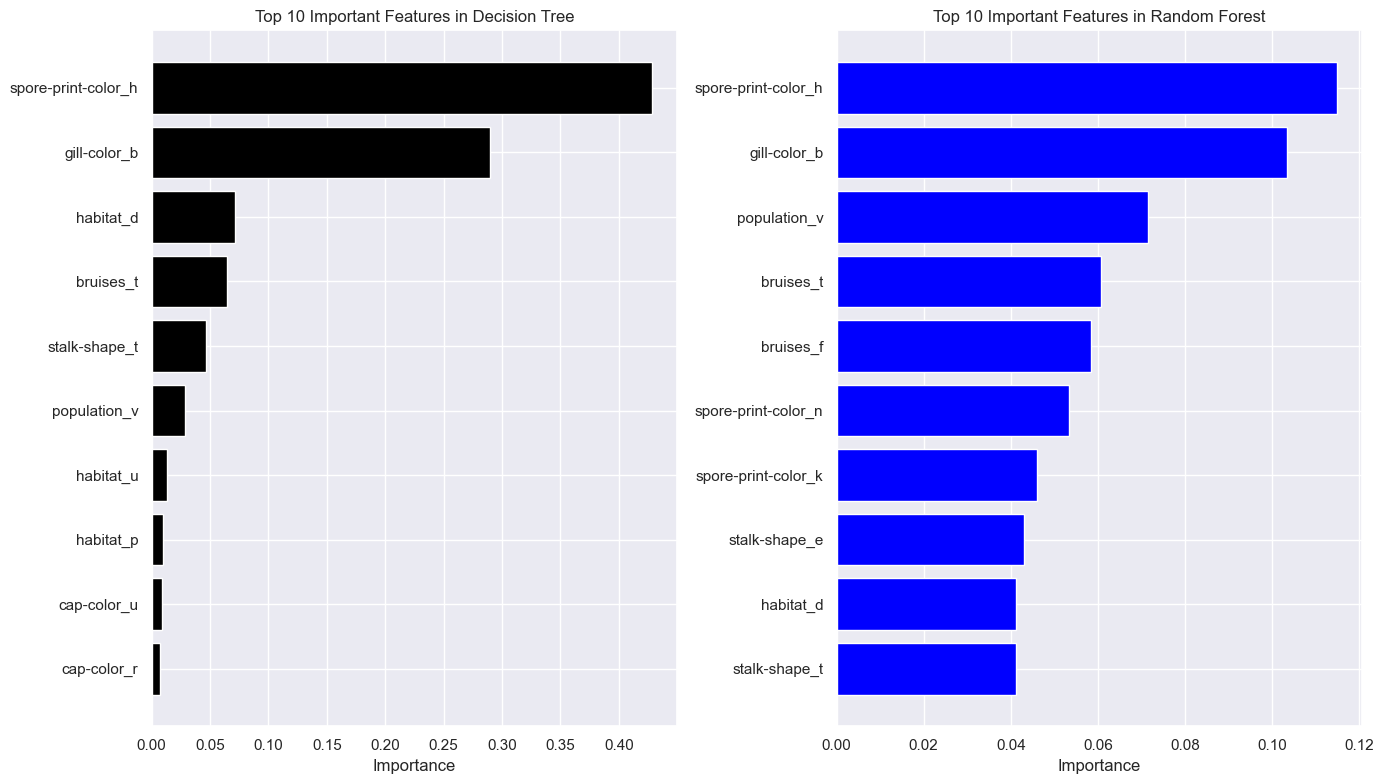

In [128]:
# Plot the top 10 important features from both Decision Tree and Random Forest for comparison
plt.figure(figsize=(14, 8))

# Decision Tree
plt.subplot(1, 2, 1)
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10], color='black')
plt.xlabel('Importance')
plt.title('Top 10 Important Features in Decision Tree')
plt.gca().invert_yaxis()

# Random Forest
plt.subplot(1, 2, 2)
plt.barh(rf_features_df['Feature'][:10], rf_features_df['Importance'][:10], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features in Random Forest')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The most important feature in the random forest model is also spore-print-color_h: chocolate(0.11), gill-color_b color:buff (0.1) followed by population_v: several(0.07). It can be observed how the difference in importance between the features is not as big as in the case of Decision Tree. A Random Forest averages feature importance across multiple trees, thus making the model more reliable.

## 3. Model Comparison & Conclusion

In [129]:
print ("Logistic Regression-----------------------------------")
print("Accuracy:", test_accuracy)
print(classification_report(y_test, test_predictions))

print('\n')
print ("KNN---------------------------------------------------")
print("Accuracy:", knn_accuracy_test)
print(knn_report)

print('\n')
print ("Decision Trees----------------------------------------")
print("Accuracy:", dt_accuracy)
print(dt_report)

print('\n')
print ("Random Forest-----------------------------------------")
print("Accuracy:", rf_accuracy)
print(rf_report)

Logistic Regression-----------------------------------
Accuracy: 0.9821538461538462
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       833
        True       0.97      0.99      0.98       792

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



KNN---------------------------------------------------
Accuracy: 0.9846153846153847
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       833
        True       0.98      0.99      0.98       792

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



Decision Trees----------------------------------------
Accuracy: 0.992
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     

It can be observed how the Logistic Regresion served as a baseline and it has been improved on with the next models increasing from an accuracy of 98.2% to 98.4% (KNN model) up to 99.2% for Decision Tree and Random Forest. Decision Tree and Random Forest gave insight into which are the most significant features that influence a mushroom's edibility.

(Q1) It can be predicted with high accuracy if a mushroom is poisonous or edible based on the selected physical characteristics.

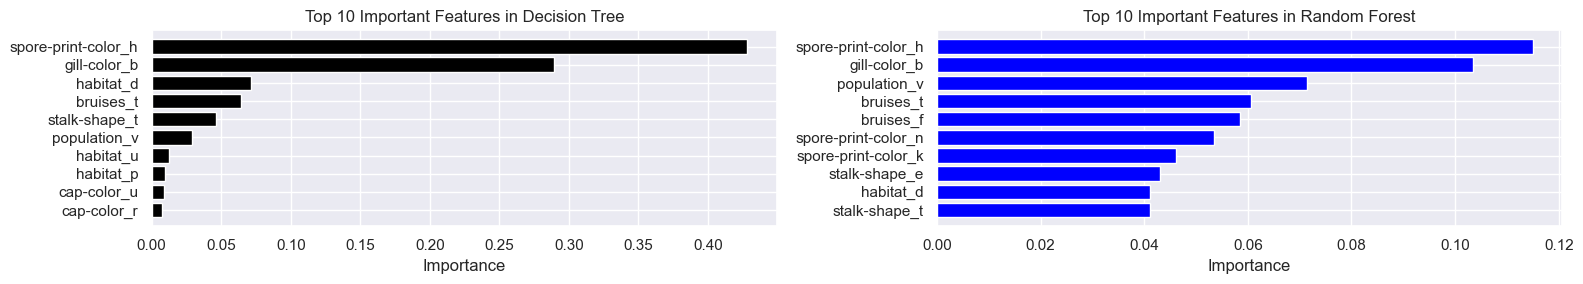

In [130]:
plt.figure(figsize=(16, 3))

plt.subplot(1, 2, 1)
plt.barh(features_df['Feature'][:10], features_df['Importance'][:10], color='black')
plt.xlabel('Importance')
plt.title('Top 10 Important Features in Decision Tree')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(rf_features_df['Feature'][:10], rf_features_df['Importance'][:10], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features in Random Forest')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

(Q2) Some of the most significant features are:  spore-print-color_h: chocolate, gill-colo_b : buff, population_v: several, bruises_t:true ,bruises_f:false , spore-print-color_n:brown, spore-print-color_k:black, stalk-shape_e:enlarging, habitat_d:woods, stak-shape_t:tapering. (from the Random Forest model which provides more reliable results)

In [131]:
student_name = "Alexandru Stefan Moroe"
student_id = "48359181"